[View in Colaboratory](https://colab.research.google.com/github/duakaran96/Handwritten-Digits-Classifier/blob/master/KNNClassify.ipynb)

# K - Nearest Neighbours (Preloaded digits dataset)

scikit-learn library comes with a few small datasets that do not require to download from any external website.

We'll apply KNN to classify handwritten digits based off the digits dataset under scikit-learn.

### Each datapoint in the dataset is a 8 x 8 image of a digit.


## Imports

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### The code below will load digits dataset.

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()

In [0]:
X = digits.data
y = digits.target

In [4]:
X.shape

(1797, 64)

In [5]:
y.shape

(1797,)

### Let's view some of the images stored under data.images[]

We'll view images with the help of matplotlib's matshow()

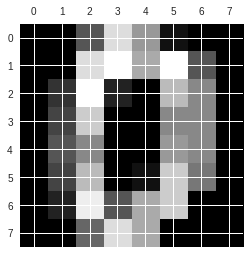

In [6]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

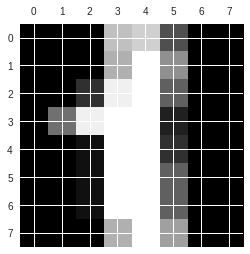

In [7]:
plt.gray()
plt.matshow(digits.images[1])
plt.show()

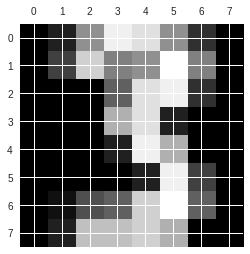

In [8]:
plt.gray()
plt.matshow(digits.images[13])
plt.show()

# Building a KNN model

## Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [11]:
X_train.shape

(1257, 64)

## Creating and Training the Model

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
neigh = KNeighborsClassifier()

In [15]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

##  Predictions from our Model

Let's grab predictions off our test set and see how well it did!


In [0]:
predictions = neigh.predict(X_test)

## Model Evaluation
Let's Evaluate our model by checking some evaluation metrics!

In [17]:
print('Score:')
score = neigh.score(X_test, y_test)
score

Score:


0.987037037037037

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print('Confusion Matrix:')
cm

Confusion Matrix:


array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 58,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  1,  0, 56,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 48]])

In a nicer way, we can view our confusion matrix as a seaborn heatmap below:

Text(0.5,1,'Accuracy Score: 0.987037037037037')

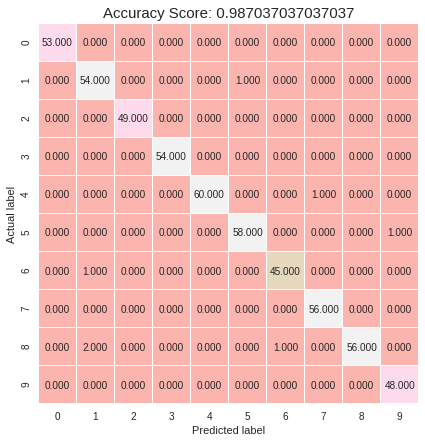

In [21]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score: '+str(score)
plt.title(title, size = 15)